# KNN - Predict whether a person will have diabetes or not


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [18]:
dataset = pd.read_csv('diabetes.csv')

In [19]:
print(len(dataset))
dataset.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Zero Handling in DataFrame

This code snippet is designed to handle zero values in a DataFrame by replacing them with the mean of the respective column.


In [20]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [21]:
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

### Dataset Splitting for Machine Learning

In [22]:
# Splitting the dataset into features (X) and target variable (y)
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [23]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


614
614
154
154


### Feature Standardization using StandardScaler

In [24]:
# Creating a StandardScaler instance
sc_X = StandardScaler()
# Standardizing the training set features
X_train = sc_X.fit_transform(X_train)
# Standardizing the testing set features using the parameters learned from the training set
X_test = sc_X.transform(X_test)

### Initializing K-Nearest Neighbors (K-NN) Classifier

In [25]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [26]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [32]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred


array([0.90909091, 0.27272727, 0.09090909, 0.54545455, 0.        ,
       0.        , 0.81818182, 0.90909091, 0.45454545, 0.36363636,
       0.54545455, 0.81818182, 0.27272727, 0.27272727, 0.36363636,
       0.09090909, 0.90909091, 0.        , 0.36363636, 0.09090909,
       0.54545455, 0.18181818, 0.09090909, 0.27272727, 0.        ,
       0.45454545, 0.        , 0.90909091, 0.        , 0.18181818,
       0.54545455, 0.18181818, 0.        , 0.63636364, 0.        ,
       0.63636364, 0.27272727, 0.09090909, 0.45454545, 0.81818182,
       0.18181818, 0.09090909, 0.18181818, 0.81818182, 0.63636364,
       0.09090909, 0.        , 0.09090909, 0.45454545, 0.27272727,
       0.63636364, 0.09090909, 0.90909091, 0.54545455, 0.09090909,
       0.        , 0.        , 0.63636364, 0.27272727, 0.63636364,
       0.81818182, 0.27272727, 0.        , 0.54545455, 0.81818182,
       0.81818182, 0.63636364, 0.18181818, 0.45454545, 0.36363636,
       0.09090909, 0.36363636, 0.        , 0.81818182, 0.81818

### Confusion Matrix , F1 Score Evaluation and accuracy

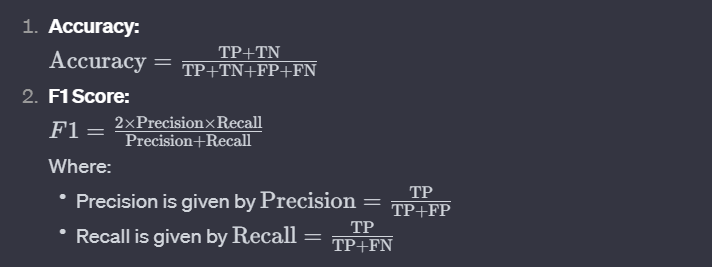

In [28]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
#TN FP
#FN TP

print(accuracy_score(y_test, y_pred))

[[94 13]
 [15 32]]
0.6956521739130435
0.8181818181818182


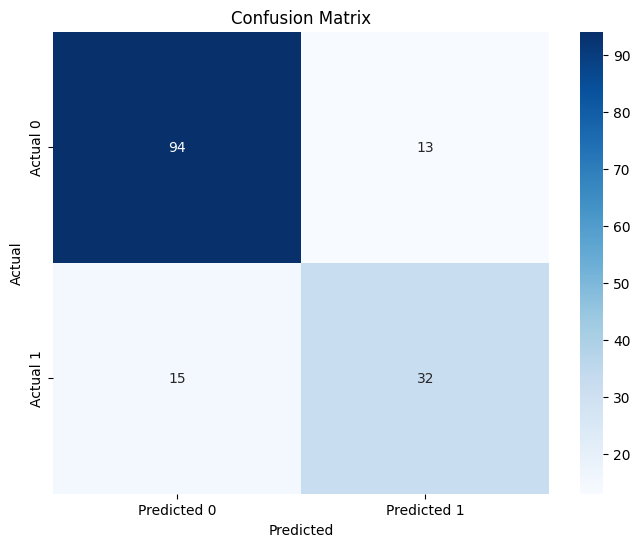

In [30]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()